In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-data-assignment/sales_data_sample (1).csv


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('/kaggle/input/sales-data-assignment/sales_data_sample (1).csv',encoding='latin1')

df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df['SALES']=df['SALES'].astype(int)
df['PRICEEACH']=df['PRICEEACH'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ORDERNUMBER       2823 non-null   int64 
 1   QUANTITYORDERED   2823 non-null   int64 
 2   PRICEEACH         2823 non-null   int64 
 3   ORDERLINENUMBER   2823 non-null   int64 
 4   SALES             2823 non-null   int64 
 5   ORDERDATE         2823 non-null   object
 6   STATUS            2823 non-null   object
 7   QTR_ID            2823 non-null   int64 
 8   MONTH_ID          2823 non-null   int64 
 9   YEAR_ID           2823 non-null   int64 
 10  PRODUCTLINE       2823 non-null   object
 11  MSRP              2823 non-null   int64 
 12  PRODUCTCODE       2823 non-null   object
 13  CUSTOMERNAME      2823 non-null   object
 14  PHONE             2823 non-null   object
 15  ADDRESSLINE1      2823 non-null   object
 16  ADDRESSLINE2      302 non-null    object
 17  CITY          

In [8]:
df['STATUS'].value_counts()

STATUS
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

In [9]:
df['COUNTRY'].value_counts()

COUNTRY
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [10]:
df['YEAR_ID'].value_counts()

YEAR_ID
2004    1345
2003    1000
2005     478
Name: count, dtype: int64

In [11]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100,15,2244,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100,1,3978,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100,4,5417,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62,1,2116,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65,9,3079,5/6/2005 0:00,On Hold,2,5,2005,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [12]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95,2,2871,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81,5,2765,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94,2,3884,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83,6,3746,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100,14,5205,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [13]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [14]:
df1=df.drop(columns=['ADDRESSLINE2','STATE','TERRITORY'])

In [15]:
df1.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      0
PRICEEACH            0
ORDERLINENUMBER      0
SALES                0
ORDERDATE            0
STATUS               0
QTR_ID               0
MONTH_ID             0
YEAR_ID              0
PRODUCTLINE          0
MSRP                 0
PRODUCTCODE          0
CUSTOMERNAME         0
PHONE                0
ADDRESSLINE1         0
CITY                 0
POSTALCODE          76
COUNTRY              0
CONTACTLASTNAME      0
CONTACTFIRSTNAME     0
DEALSIZE             0
dtype: int64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ct=df1.groupby('COUNTRY')['SALES'].sum() #Countries by sum of sales

ct=pd.DataFrame(data=ct) #Create dataframe

top_five=ct.sort_values(by='SALES',ascending=False).head(5)

top_five

top5 = pd.DataFrame(top_five)

top5

,SALES
COUNTRY,
USA,3627511
Spain,1215530
France,1110770
Australia,630535
UK,478814


In [18]:
df1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [19]:
products=pd.DataFrame(df1.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum())

products

,QUANTITYORDERED
PRODUCTLINE,
Classic Cars,33992
Motorcycles,11663
Planes,10727
Ships,8127
Trains,2712
Trucks and Buses,10777
Vintage Cars,21069


In [20]:
USA = pd.DataFrame(df1.loc[df1.COUNTRY=='USA'])
UK = pd.DataFrame(df1.loc[df1.COUNTRY=='UK'])
OZ = pd.DataFrame(df1.loc[df1.COUNTRY=='Australia'])
FR = pd.DataFrame(df1.loc[df1.COUNTRY=='France'])
SP = pd.DataFrame(df1.loc[df1.COUNTRY=='Spain'])

tf = pd.DataFrame(df1.loc[(df1['COUNTRY']=='USA') | (df1['COUNTRY']=='UK') | (df1['COUNTRY']=='Spain') | (df1['COUNTRY']=='France') | (df1['COUNTRY']=='Australia')])

In [21]:
tf_2004 = tf.loc[tf.YEAR_ID==2004]

tf_2004

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
9,10211,41,100,14,4708,1/15/2004 0:00,Shipped,1,1,2004,...,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
10,10223,37,100,1,3965,2/20/2004 0:00,Shipped,1,2,2004,...,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
11,10237,23,100,7,2333,4/5/2004 0:00,Shipped,2,4,2004,...,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small
12,10251,28,100,2,3188,5/18/2004 0:00,Shipped,2,5,2004,...,S10_1678,Tekni Collectables Inc.,2015559350,7476 Moss Rd.,Newark,94019,USA,Brown,William,Medium
13,10263,34,100,2,3676,6/28/2004 0:00,Shipped,2,6,2004,...,S10_1678,Gift Depot Inc.,2035552570,25593 South Bay Ln.,Bridgewater,97562,USA,King,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,10248,23,65,9,1506,5/7/2004 0:00,Cancelled,2,5,2004,...,S72_3212,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
2814,10306,35,59,6,2082,10/14/2004 0:00,Shipped,4,10,2004,...,S72_3212,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,Manchester,EC2 5NT,UK,Ashworth,Victoria,Small
2815,10315,40,55,5,2227,10/29/2004 0:00,Shipped,4,10,2004,...,S72_3212,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",Nantes,44000,France,Labrune,Janine,Small
2817,10337,42,97,5,4080,11/21/2004 0:00,Shipped,4,11,2004,...,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,10022,USA,Hernandez,Maria,Medium


In [22]:
USA['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        329
Vintage Cars        224
Motorcycles         149
Trucks and Buses    112
Planes               95
Ships                70
Trains               25
Name: count, dtype: int64

In [23]:
tft = pd.DataFrame(tf_2004.groupby(['COUNTRY', 'PRODUCTLINE'])[['SALES','QUANTITYORDERED']].sum()).reset_index()

tft

,COUNTRY,PRODUCTLINE,SALES,QUANTITYORDERED
0,Australia,Classic Cars,76280,644
1,Australia,Motorcycles,33119,324
2,Australia,Planes,41416,427
3,Australia,Ships,1089,24
4,Australia,Trucks and Buses,36101,328
5,Australia,Vintage Cars,44359,485
6,France,Classic Cars,184336,1704
7,France,Motorcycles,95401,1093
8,France,Planes,29709,321
9,France,Ships,38765,455


In [24]:
tf

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95,2,2871,2/24/2003 0:00,Shipped,1,2,2003,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81,5,2765,5/7/2003 0:00,Shipped,2,5,2003,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94,2,3884,7/1/2003 0:00,Shipped,3,7,2003,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83,6,3746,8/25/2003 0:00,Shipped,3,8,2003,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10159,49,100,14,5205,10/10/2003 0:00,Shipped,4,10,2003,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,NaN,USA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,10337,42,97,5,4080,11/21/2004 0:00,Shipped,4,11,2004,...,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,NYC,10022,USA,Hernandez,Maria,Medium
2818,10350,20,100,15,2244,12/2/2004 0:00,Shipped,4,12,2004,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2820,10386,43,100,4,5417,3/1/2005 0:00,Resolved,1,3,2005,...,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2821,10397,34,62,1,2116,3/28/2005 0:00,Shipped,1,3,2005,...,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [25]:
tft

,COUNTRY,PRODUCTLINE,SALES,QUANTITYORDERED
0,Australia,Classic Cars,76280,644
1,Australia,Motorcycles,33119,324
2,Australia,Planes,41416,427
3,Australia,Ships,1089,24
4,Australia,Trucks and Buses,36101,328
5,Australia,Vintage Cars,44359,485
6,France,Classic Cars,184336,1704
7,France,Motorcycles,95401,1093
8,France,Planes,29709,321
9,France,Ships,38765,455


In [26]:
ms = pd.DataFrame(tf_2004.groupby(['MONTH_ID', 'PRODUCTLINE','DEALSIZE'])[['SALES','QUANTITYORDERED']].sum()).reset_index()

ms

,MONTH_ID,PRODUCTLINE,DEALSIZE,SALES,QUANTITYORDERED
0,1,Classic Cars,Large,16100,87
1,1,Classic Cars,Medium,84739,675
2,1,Classic Cars,Small,21936,311
3,1,Motorcycles,Medium,16741,154
4,1,Motorcycles,Small,7811,133
...,...,...,...,...,...
159,12,Trucks and Buses,Medium,50831,402
160,12,Trucks and Buses,Small,9711,167
161,12,Vintage Cars,Large,9720,48
162,12,Vintage Cars,Medium,57743,511


In [27]:
pivot_deal = pd.pivot_table(ms, values='QUANTITYORDERED', index=['MONTH_ID'],
                       columns=['DEALSIZE'], aggfunc="sum")
pivot_deal

DEALSIZE,Large,Medium,Small
MONTH_ID,,,
1,137,1442,1089
2,138,988,756
3,88,918,634
4,80,493,556
5,170,1272,943
6,41,1127,799
7,138,1114,829
8,135,1415,939
9,44,368,365


In [28]:
pivot_prod = pd.pivot_table(ms, values='QUANTITYORDERED', index=['MONTH_ID'],
                       columns=['PRODUCTLINE'], aggfunc="sum",fill_value=0)
pivot_prod

PRODUCTLINE,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars
MONTH_ID,,,,,,,
1,1073,287,91,332,78,46,761
2,350,493,424,247,0,126,242
3,432,0,0,244,48,314,602
4,266,320,0,0,0,0,543
5,466,466,424,305,42,353,329
6,496,493,415,76,0,0,487
7,738,214,434,24,88,380,203
8,1203,675,45,43,109,327,87
9,221,71,0,149,66,153,117


In [29]:
classic=tf_2004.loc[tf.PRODUCTLINE=='Classic Cars']

classic

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
36,10215,35,100,3,6075,1/29/2004 0:00,Shipped,1,1,2004,...,S10_1949,West Coast Collectables Co.,3105553722,3675 Furth Circle,Burbank,94019,USA,Thompson,Steve,Medium
37,10228,29,100,2,6463,3/10/2004 0:00,Shipped,1,3,2004,...,S10_1949,Cambridge Collectables Co.,6175555555,4658 Baden Av.,Cambridge,51247,USA,Tseng,Kyung,Medium
38,10245,34,100,9,6120,5/4/2004 0:00,Shipped,2,5,2004,...,S10_1949,Super Scale Inc.,2035559545,567 North Pendale Street,New Haven,97823,USA,Murphy,Leslie,Medium
40,10270,21,100,9,4905,7/19/2004 0:00,Shipped,3,7,2004,...,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,2067,Australia,Huxley,Adrian,Medium
43,10304,47,100,6,10172,10/11/2004 0:00,Shipped,4,10,2004,...,S10_1949,Auto Assoc. & Cie.,30.59.8555,"67, avenue de l'Europe",Versailles,78000,France,Tonini,Daniel,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2631,10304,40,100,1,4208,10/11/2004 0:00,Shipped,4,10,2004,...,S700_2824,Auto Assoc. & Cie.,30.59.8555,"67, avenue de l'Europe",Versailles,78000,France,Tonini,Daniel,Medium
2633,10324,34,100,5,4248,11/5/2004 0:00,Shipped,4,11,2004,...,S700_2824,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Medium
2634,10336,46,100,2,9558,11/20/2004 0:00,Shipped,4,11,2004,...,S700_2824,"La Corne D'abondance, Co.",(1) 42.34.2555,"265, boulevard Charonne",Paris,75012,France,Bertrand,Marie,Large
2635,10348,32,82,7,2650,11/1/2004 0:00,Shipped,4,11,2004,...,S700_2824,"Corrida Auto Replicas, Ltd",(91) 555 22 82,"C/ Araquil, 67",Madrid,28023,Spain,Sommer,Mart¡n,Small


In [30]:
pricexmsrp = classic.groupby(['MONTH_ID','COUNTRY'])[['MSRP','PRICEEACH']].mean().reset_index()

pricexmsrp.head()

,MONTH_ID,COUNTRY,MSRP,PRICEEACH
0,1,France,131.90,91.000
1,1,Spain,108.75,87.375
2,1,UK,94.00,91.500
3,1,USA,175.00,100.000
4,2,USA,110.30,83.500


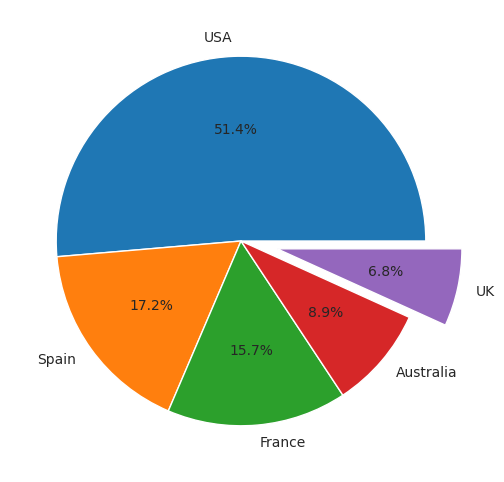

In [31]:
explode = [0, 0, 0, 0, 0.2]
labels = ['USA','Spain','France','Australia','UK']

sns.set_style("whitegrid") # Set style for chart
plt.figure(figsize=(6,6)) # Set figure size
plt.pie(top5['SALES'],labels=labels, autopct='%1.1f%%',explode=explode) # Create pie chart
plt.show() # Show chart

Text(0, 0.5, 'Sales')

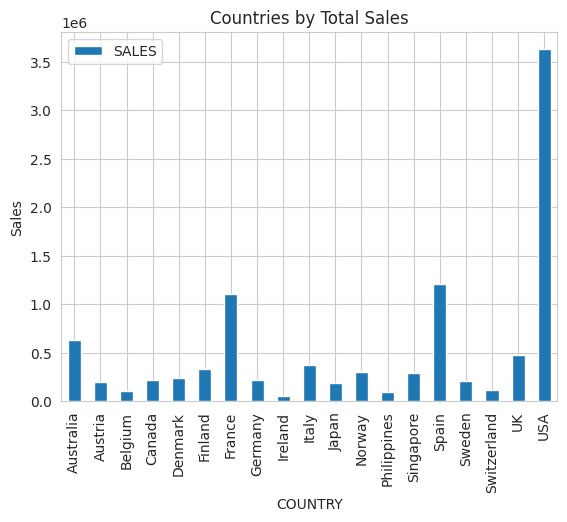

In [32]:
ct.plot(kind='bar')
plt.title("Countries by Total Sales")
plt.ylabel("Sales")

<Axes: xlabel='MONTH_ID', ylabel='SALES'>

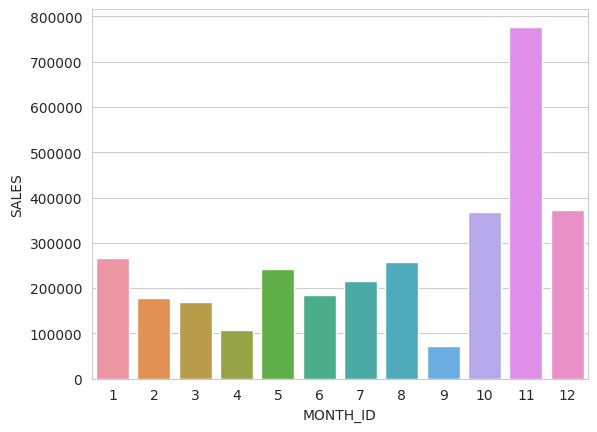

In [33]:
sns.barplot(ms, x="MONTH_ID", y="SALES", estimator="sum", errorbar=None)


Text(0.5, 0, 'Product Line')

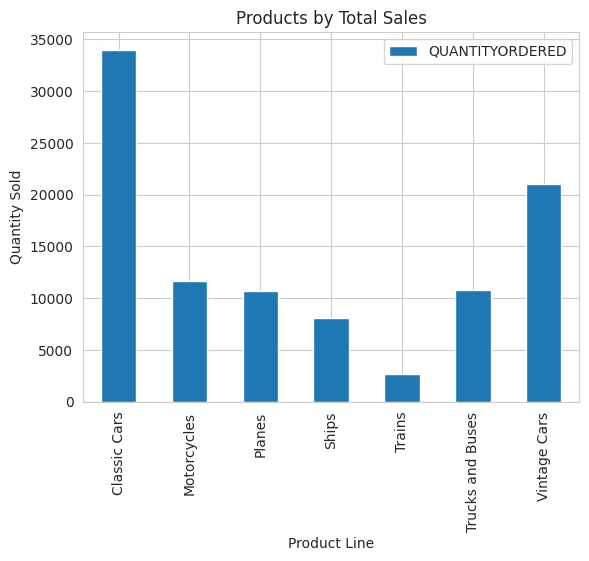

In [34]:
products.plot(kind='bar')
plt.title("Products by Total Sales")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Line")

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='QUANTITYORDERED', ylabel='DEALSIZE'>

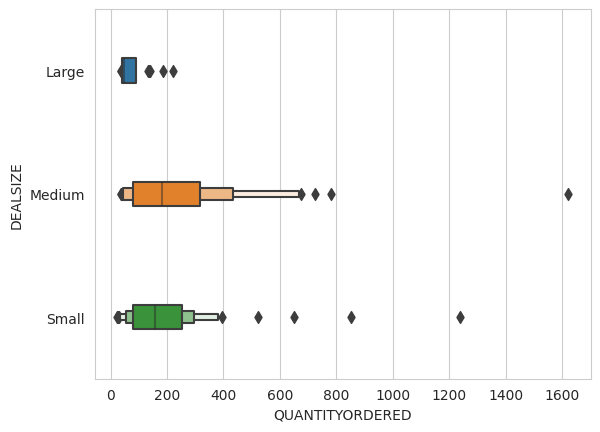

In [35]:
sns.boxenplot(data=ms, x="QUANTITYORDERED", y="DEALSIZE", width=.2)

Text(0.5, 1.0, 'Total Quantity Ordered per Month by Deal Size')

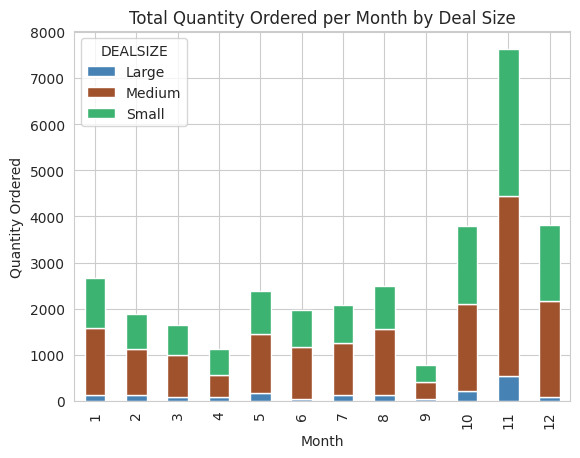

In [36]:
pivot_deal.plot(kind='bar', stacked=True, color=['steelblue', 'sienna', 'mediumseagreen'])
 

plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
 

plt.title('Total Quantity Ordered per Month by Deal Size')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='QUANTITYORDERED', ylabel='PRODUCTLINE'>

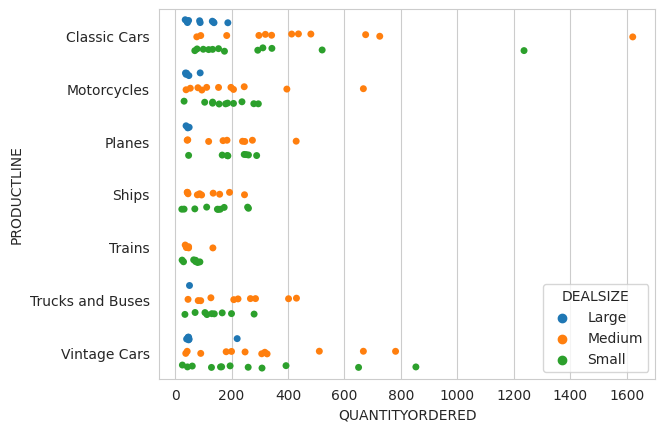

In [37]:
sns.stripplot(data=ms, x="QUANTITYORDERED", y="PRODUCTLINE", hue="DEALSIZE", dodge=True)

Text(0.5, 1.0, 'Total Quantity Sold per Month by Product')

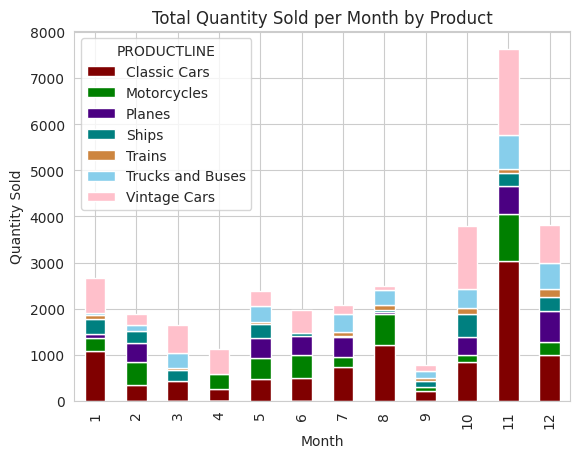

In [38]:
pivot_prod.plot(kind='bar', stacked=True, color=['maroon','green','indigo','teal','peru',
                                                'skyblue','pink'])
 

plt.xlabel('Month')
plt.ylabel('Quantity Sold')
 

plt.title('Total Quantity Sold per Month by Product')

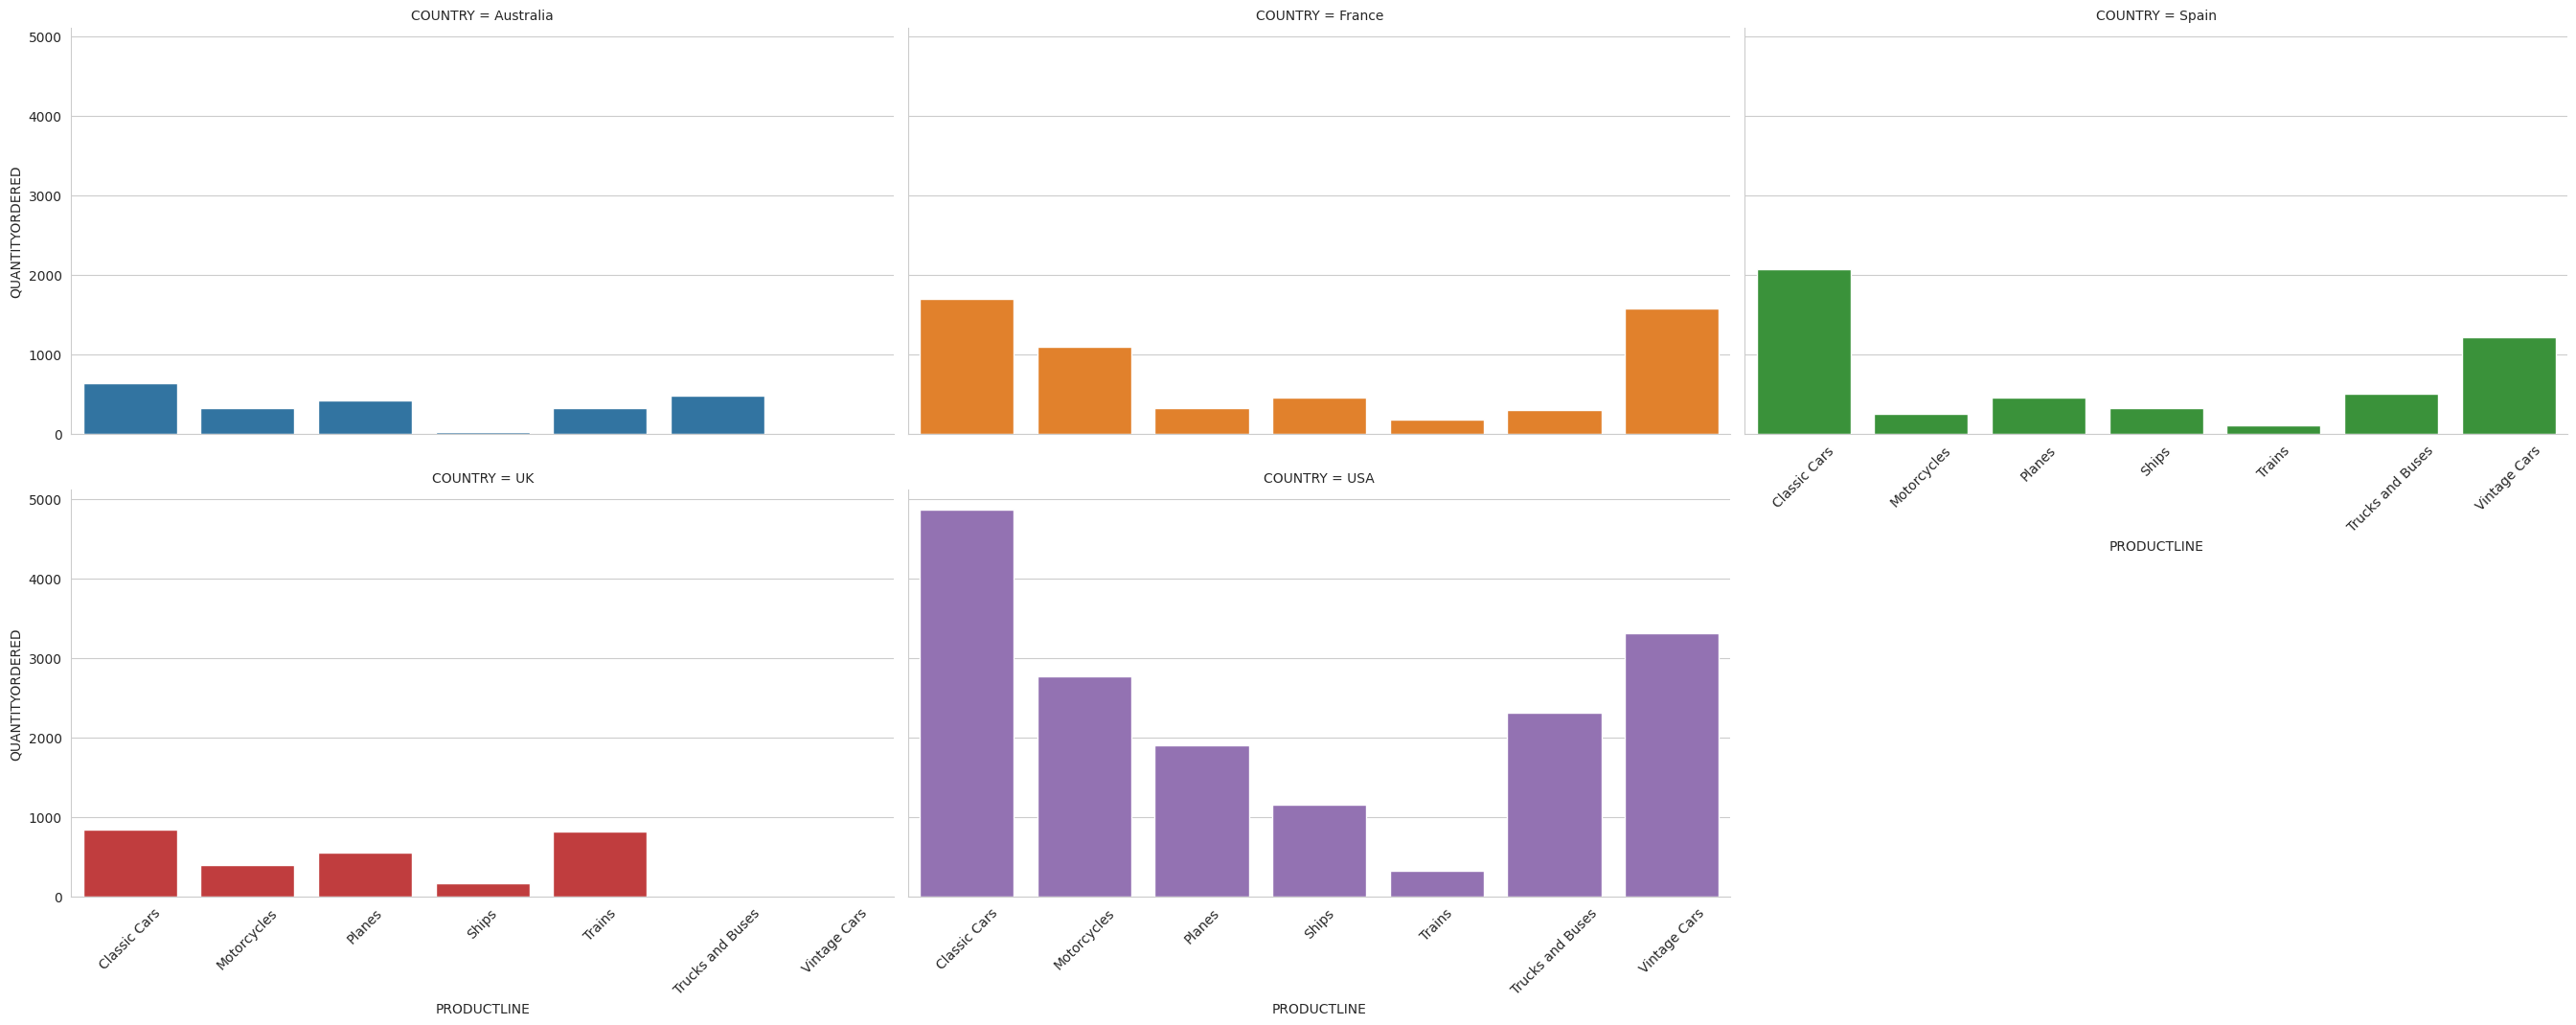

In [39]:
g = sns.FacetGrid(tft, col='COUNTRY',height=5,aspect=1.8,col_wrap=3,hue='COUNTRY')
g.map_dataframe(sns.barplot, x='PRODUCTLINE',y='QUANTITYORDERED')
g.tick_params(axis='x', rotation=45)

In [40]:
classic.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
36,10215,35,100,3,6075,1/29/2004 0:00,Shipped,1,1,2004,...,S10_1949,West Coast Collectables Co.,3105553722,3675 Furth Circle,Burbank,94019,USA,Thompson,Steve,Medium
37,10228,29,100,2,6463,3/10/2004 0:00,Shipped,1,3,2004,...,S10_1949,Cambridge Collectables Co.,6175555555,4658 Baden Av.,Cambridge,51247,USA,Tseng,Kyung,Medium
38,10245,34,100,9,6120,5/4/2004 0:00,Shipped,2,5,2004,...,S10_1949,Super Scale Inc.,2035559545,567 North Pendale Street,New Haven,97823,USA,Murphy,Leslie,Medium
40,10270,21,100,9,4905,7/19/2004 0:00,Shipped,3,7,2004,...,S10_1949,Souveniers And Things Co.,+61 2 9495 8555,"Monitor Money Building, 815 Pacific Hwy",Chatswood,2067,Australia,Huxley,Adrian,Medium
43,10304,47,100,6,10172,10/11/2004 0:00,Shipped,4,10,2004,...,S10_1949,Auto Assoc. & Cie.,30.59.8555,"67, avenue de l'Europe",Versailles,78000,France,Tonini,Daniel,Large


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='QUANTITYORDERED', ylabel='Count'>

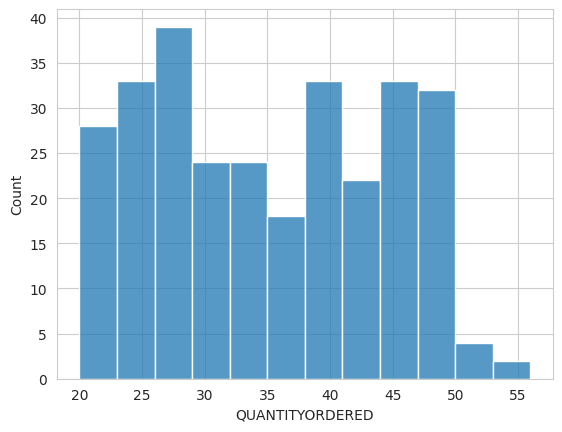

In [41]:
sns.histplot(data=classic, x="QUANTITYORDERED", binwidth=3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='MONTH_ID', ylabel='MSRP'>

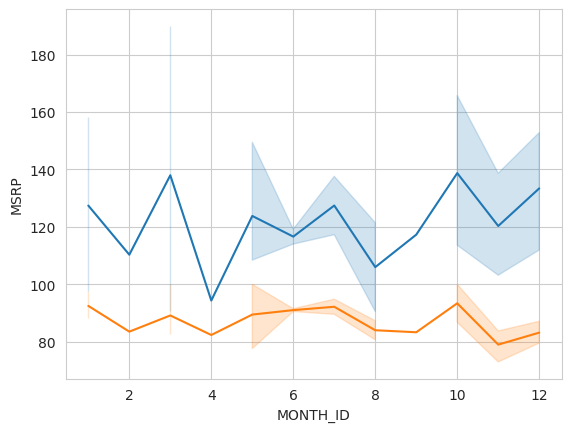

In [42]:
sns.lineplot(x='MONTH_ID', y='MSRP', data=pricexmsrp)
sns.lineplot(x='MONTH_ID', y='PRICEEACH', data=pricexmsrp,legend='brief')


In [43]:
pricexmsrp = classic.groupby(['MONTH_ID','COUNTRY'])[['MSRP','PRICEEACH']].mean().reset_index()

pricexmsrp.head()

,MONTH_ID,COUNTRY,MSRP,PRICEEACH
0,1,France,131.90,91.000
1,1,Spain,108.75,87.375
2,1,UK,94.00,91.500
3,1,USA,175.00,100.000
4,2,USA,110.30,83.500
